In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from lib.help_function import *
from lib.rank_lib import *
from lib.feature_lib import *

DATA_PATH = './data/data.csv'

## Data preprocessing

In [2]:
data = pd.read_csv(DATA_PATH)
y = data.diagnosis
temp_list = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(temp_list, axis =1)

In [3]:
data_label = y
data = x
data_normalize = (data- data.mean()) / (data.std())

col_name_list = data_normalize.columns
#print(col_name_list)
data_normalize.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_data = min_max_scaler.fit_transform(data_normalize)
data_normal_scale = pd.DataFrame(min_max_data)

data_normal_scale.columns = col_name_list
data_normal_scale.head()

temp_data_scale = min_max_scaler.fit_transform(data)
temp_data_scale = pd.DataFrame(min_max_data)
temp_data_scale.columns = col_name_list
temp_data_scale.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## Ranking system

In [9]:
chi_score_list_raw,chi_rank = get_chi_score(data,data_label)
temp1,fisher_rank =get_fisher_score(data_normal_scale,y)
temp2,lap_rank=get_lap_score(data_normal_scale)

final_rank,final_result = get_feature_ranking(data_normal_scale, chi_rank,fisher_rank,lap_rank)

                    Feature   ranking
22          perimeter_worst  2.862069
23               area_worst  2.724138
20             radius_worst  2.689655
3                 area_mean  2.586207
2            perimeter_mean  2.551724
0               radius_mean  2.344828
7       concave points_mean  2.344828
27     concave points_worst  2.310345
6            concavity_mean  2.034483
13                  area_se  2.000000
26          concavity_worst  2.000000
25        compactness_worst  1.793103
5          compactness_mean  1.793103
21            texture_worst  1.793103
12             perimeter_se  1.620690
10                radius_se  1.482759
1              texture_mean  1.448276
24         smoothness_worst  1.275862
15           compactness_se  0.965517
28           symmetry_worst  0.931034
29  fractal_dimension_worst  0.896552
17        concave points_se  0.862069
4           smoothness_mean  0.827586
16             concavity_se  0.758621
8             symmetry_mean  0.689655
9    fractal

## Feature Selection Method  
- Random selection  
- Minmax selection  
- Cluster selection

### Random selection

In [32]:
random_model_list, random_mean_result, random_std_result = feature_random_test(data_normal_scale, y,num_iter=10)


[Number of Feature] :  0


/home/bono/.pyenv/versions/3.6.5/envs/math_camp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[Number of Feature] :  1
[Number of Feature] :  2
[Number of Feature] :  3
[Number of Feature] :  4
[Number of Feature] :  5
[Number of Feature] :  6
[Number of Feature] :  7
[Number of Feature] :  8
[Number of Feature] :  9
[Number of Feature] :  10
[Number of Feature] :  11
[Number of Feature] :  12
[Number of Feature] :  13
[Number of Feature] :  14
[Number of Feature] :  15
[Number of Feature] :  16
[Number of Feature] :  17
[Number of Feature] :  18
[Number of Feature] :  19
[Number of Feature] :  20
[Number of Feature] :  21
[Number of Feature] :  22
[Number of Feature] :  23
[Number of Feature] :  24
[Number of Feature] :  25
[Number of Feature] :  26
[Number of Feature] :  27
[Number of Feature] :  28
[Number of Feature] :  29


already exist the folder in this path : ./result
LR
RF
KNN
SVM
LSVM
GNB
DTC
GBC
XG
LR
RF
KNN
SVM
LSVM
GNB
DTC
GBC
XG


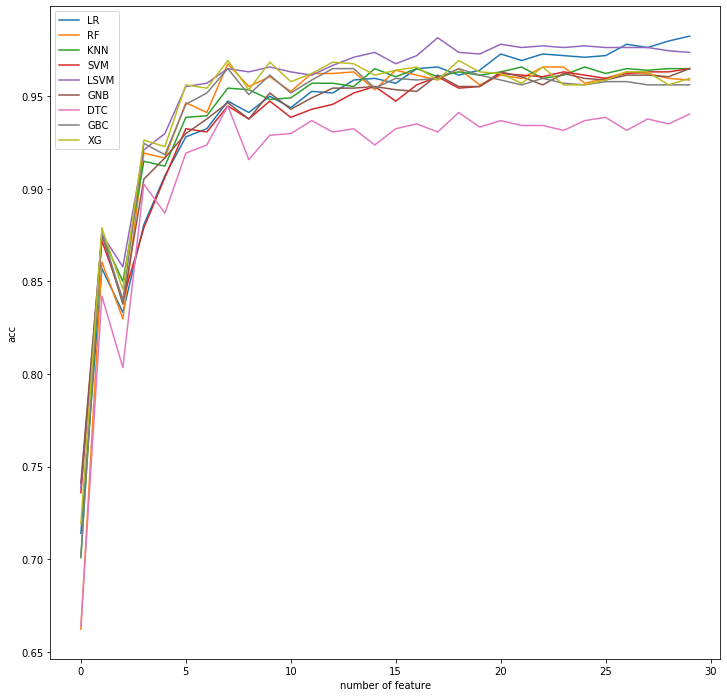

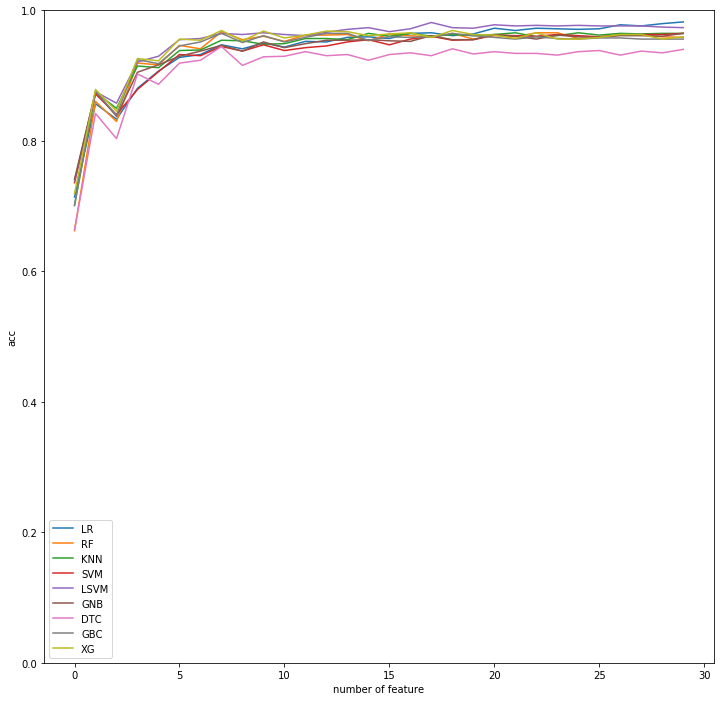

In [7]:
plot_random_model_acc(random_model_list,random_mean_result , random_std_result)

### Minmax selection

In [8]:

select_feature_list = minmax_selector(data_normal_scale,10,'area_worst')

print(select_feature_list)

['area_worst', 'fractal_dimension_mean', 'texture_se', 'symmetry_worst', 'concave points_se', 'texture_mean', 'smoothness_se', 'symmetry_se', 'smoothness_worst', 'concavity_worst']


In [9]:
target_feature = 'perimeter_worst'

model_list, acc_list = feature_minmax_test(data_normal_scale,y,target_feature)

/home/bono/.pyenv/versions/3.6.5/envs/math_camp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


already exist the folder in this path : ./result


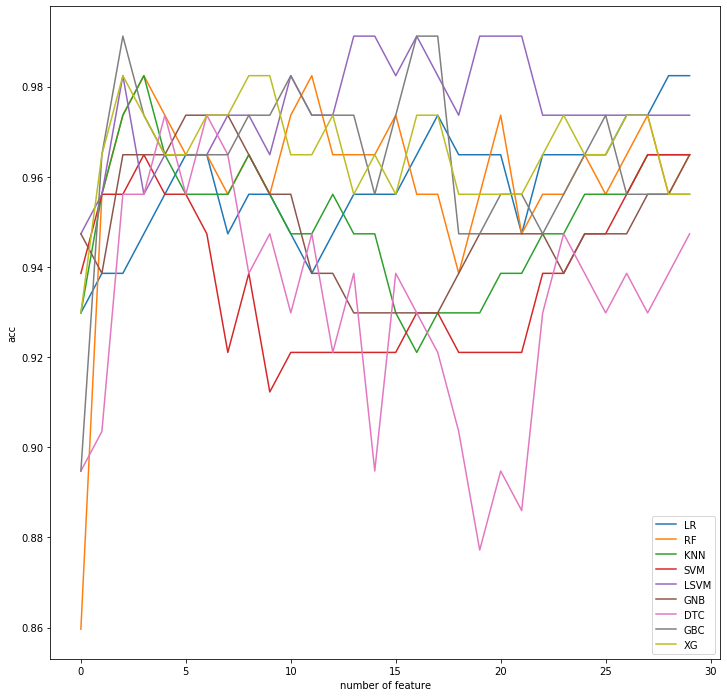

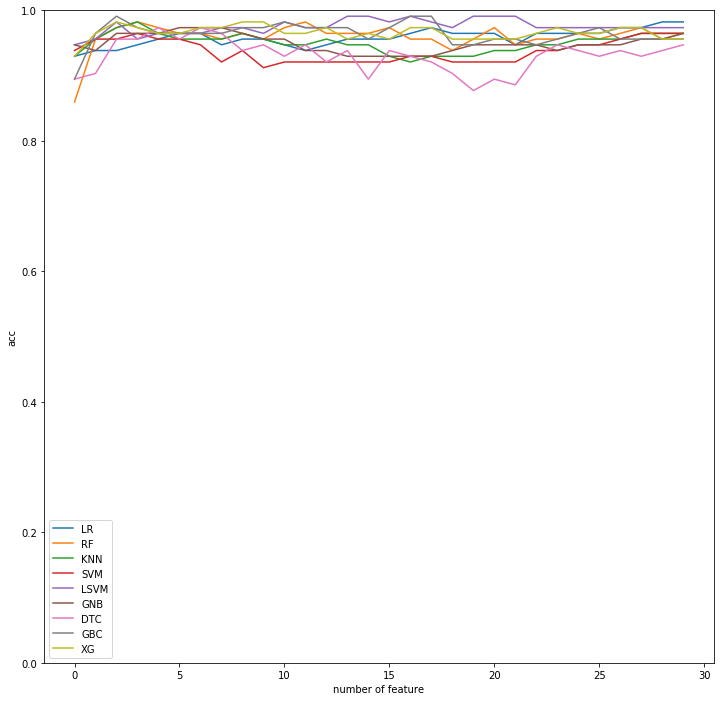

In [10]:
plot_model_acc(model_list,acc_list,target_feature)

### Cluster selection

In [27]:
from sklearn.manifold import MDS

embedding = MDS(dissimilarity='precomputed')
mds_f = embedding.fit_transform(np.arccos(np.corrcoef(data.values.T)))

temp = 0
while temp != 30:
    cluster_dic = get_cluster_output(mds_f,col_name_list)
    temp = len(cluster_dic)
    print(temp)

30


In [28]:
print(len(data.columns))

30


In [29]:
print(len(cluster_dic))

30


In [30]:

final_cluster_result = np.zeros((30,9))

for i in range(30):
    cluster_list = get_in_cluster_ranking(final_result, cluster_dic[i+1])
    data_clusterd = data_normal_scale[cluster_list]
    model_cluster_list, acc_cluster_list = feature_cluster_test(data_clusterd,y)
    #print(acc_cluster_list)
    
    final_cluster_result[i] = np.asarray(acc_cluster_list)

/home/bono/.pyenv/versions/3.6.5/envs/math_camp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/bono/.pyenv/versions/3.6.5/envs/math_camp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/bono/.pyenv/versions/3.6.5/envs/math_camp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/bono/.pyenv/versions/3.6.5/envs/math_camp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

already exist the folder in this path : ./result


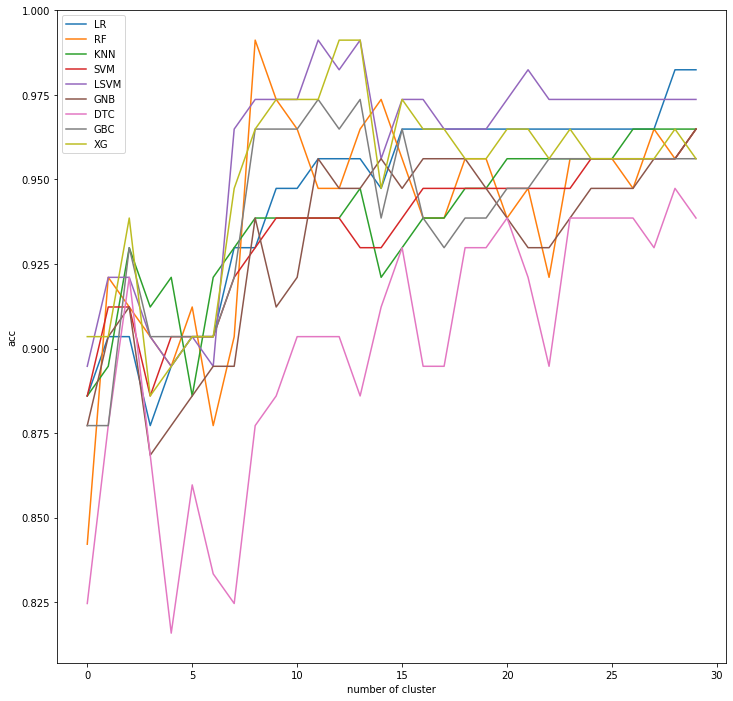

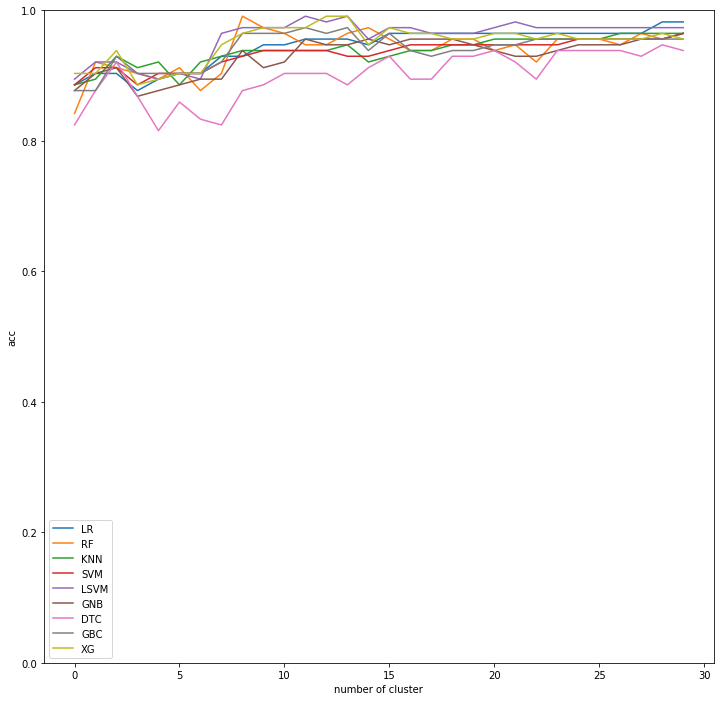

In [34]:
plot_cluster_model_acc(random_model_list,final_cluster_result)